In [5]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import pandas as pd
import pandas as pd
import pickle

from matplotlib.pyplot import *
from utility import *
from scipy import optimize, sqrt
from matplotlib.patches import Ellipse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
base_name = 'v04_T1_R_3d'
with open('dataset/%s.np'%base_name, 'rb') as f:
    img = pickle.load(f)

In [34]:
w, h = img.shape
def resize_back(img, resize_factor, back=True):
    w, h = img.shape
    resized_image = cv2.resize(img, (h//resize_factor, w))
    if back:
        return cv2.resize(resized_image, (h, w))
    return resized_image
orig_img = img.copy()
half_img = resize_back(img, 2, False)
forth_image = resize_back(img, 4, False)
tenth_image = resize_back(img, 10, False)

In [35]:
row = np.random.randint(half_img.shape[0])
row = 10080
print("row number %r"%row)
imgs = [orig_img, half_img, forth_image, tenth_image]

row number 10080


[   95    96    97 ... 18050 18051 18052]
scale = 0.41372462488967343
kernel size param 35
17958 17958 35
17888 17888
[*]  17958 18128
Skipped drawing circle at 1545 due to radius of curvature being too high
Skipped drawing circle at 2737 due to radius of curvature being too high
Skipped drawing circle at 5096 due to radius of curvature being too high
Skipped drawing circle at 5318 due to radius of curvature being too high


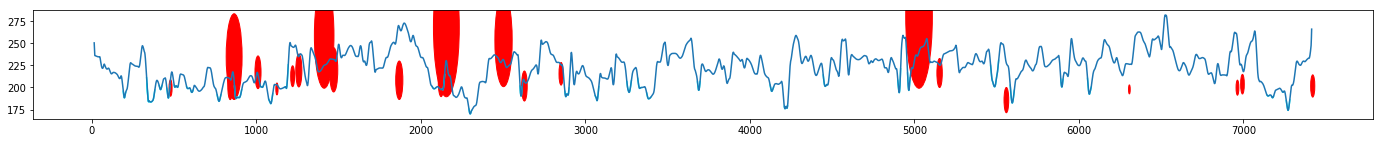

[  47   48   49 ... 9024 9025 9026]
scale = 0.8274492497793469
kernel size param 18
8980 8980 18
8944 8944
[*]  8980 9064
Skipped drawing circle at 772 due to radius of curvature being too high
Skipped drawing circle at 1064 due to radius of curvature being too high
Skipped drawing circle at 1368 due to radius of curvature being too high
Skipped drawing circle at 2548 due to radius of curvature being too high
Skipped drawing circle at 2659 due to radius of curvature being too high


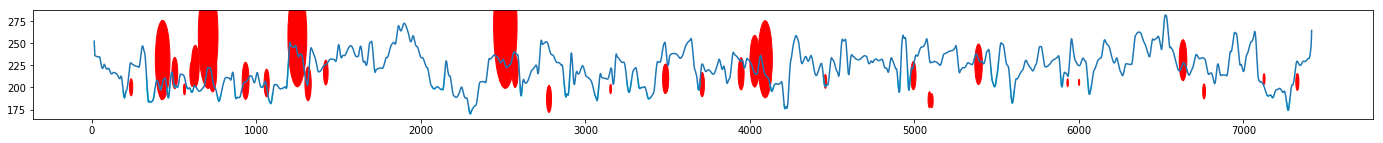

[  24   25   26 ... 4510 4511 4512]
scale = 1.6548984995586937
kernel size param 9
4489 4489 9
4471 4471
l <= 2
get_neighborhood at index 305 returned None
l <= 2
get_neighborhood at index 2544 returned None
l <= 2
get_neighborhood at index 4366 returned None
[*]  4489 4532
Skipped drawing circle at 386 due to radius of curvature being too high
Skipped drawing circle at 531 due to radius of curvature being too high
Skipped drawing circle at 684 due to radius of curvature being too high
Skipped drawing circle at 1248 due to radius of curvature being too high
Skipped drawing circle at 1273 due to radius of curvature being too high
Skipped drawing circle at 1329 due to radius of curvature being too high


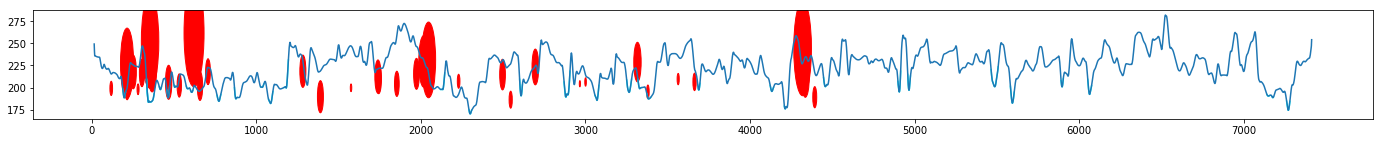

[   9   10   11 ... 1802 1803 1804]
scale = 4.139072847682119
kernel size param 4
1796 1796 4
1788 1788
l <= 2
get_neighborhood at index 44 returned None
l <= 2
get_neighborhood at index 97 returned None
l <= 2
get_neighborhood at index 109 returned None
l <= 2
get_neighborhood at index 119 returned None
l <= 2
get_neighborhood at index 137 returned None
l <= 2
get_neighborhood at index 143 returned None
l <= 2
get_neighborhood at index 183 returned None
l <= 2
get_neighborhood at index 208 returned None
l <= 2
get_neighborhood at index 245 returned None
l <= 2
get_neighborhood at index 273 returned None
l <= 2
get_neighborhood at index 495 returned None
l <= 2
get_neighborhood at index 509 returned None
l <= 2
get_neighborhood at index 528 returned None
l <= 2
get_neighborhood at index 552 returned None
l <= 2
get_neighborhood at index 627 returned None
l <= 2
get_neighborhood at index 801 returned None
l <= 2
get_neighborhood at index 814 returned None
l <= 2
get_neighborhood at inde

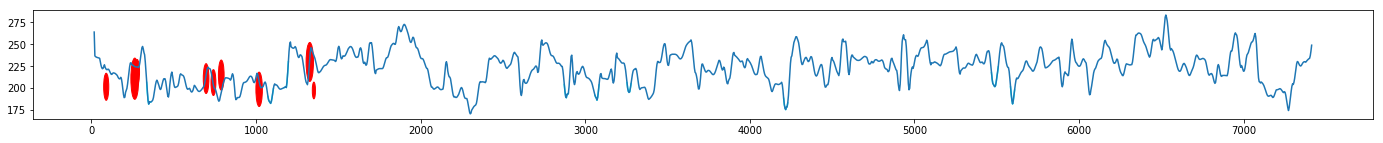

In [146]:
rcParams['figure.figsize'] = 24, 2
allCircles = []
for img in imgs:
    profile = img[row]
    x = np.where(profile>0)[0]
    print(x)
    profile = profile[x]
    scale = 7500 / img.shape[1]
    print("scale = %r"%scale)
    _kernel_size = int(np.percentile(get_cut_points(profile, profile.mean()), 25))
    print("kernel size param %r"%_kernel_size)
    fig, ax = subplots()
    x, y, der1, der2, local_minima_2d, circles = extract_circles(np.arange(len(profile)),
                                                                 profile,
                                                                 kernel_size_param=_kernel_size,
                                                                 same_scale=False,
                                                                 x_scale=scale)
    print('[*] ', len(profile), img.shape[1])
    #ax.set_xlim(np.array([5000, 8000]))
    #ax.plot(x, y)
    #ax.scatter(x[local_minima_2d], y[local_minima_2d])
    draw_circles(x, y, circles, ax=ax, drop_large_radius=True)
    show()
    allCircles.append(circles)

In [144]:
radii_of_curvature = lambda c, s : c.r * ((c.x_std*s)**2) / c.y_std       
print([np.mean([circle.x_std for circle in circles]) for circles in allCircles])
print([np.mean([radii_of_curvature(circle,i*.4) for circle in circles]) for i, circles in zip([1,2,4,10],allCircles)])

[14.627138420438364, 7.656553914683399, 4.107497063954073, 2.2422120181506973]
[32.070016980339965, 32.32870325470314, 32.29403796744836, 32.84165092100201]


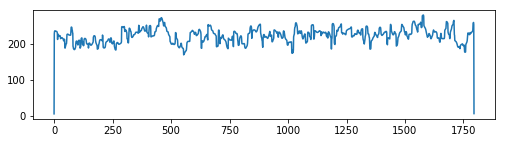

In [90]:
plot(profile)

In [131]:
7500/orig_img.shape[1]

0.41372462488967343